In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

#### Logistic Regression
- Fundamentals: 
 https://docs.google.com/presentation/d/1AzgB6opDhEuAdBHZS8GRbBV6BtQCqb9JSAElM4-H6nk/edit?usp=sharing
- logistic regression in sklearn

Pros and Cons

In [2]:
from pydataset import data

df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# columns name change
df.columns = [col.lower().replace('.', '_') for col in df]
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## Predict if species is virginica or not

In [4]:
# create a new column encoded column 'virginica'
df['virginica'] = np.where(df.species == 'virginica', 1, 0)

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,virginica
1,5.1,3.5,1.4,0.2,setosa,0
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0
4,4.6,3.1,1.5,0.2,setosa,0
5,5.0,3.6,1.4,0.2,setosa,0


In [6]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [7]:
train, validate, test = train_validate_test_split(df,
                                                  target = 'virginica',
                                                  seed=123)

In [8]:
train.shape, validate.shape, test.shape

((84, 6), (36, 6), (30, 6))

In [9]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,virginica
147,6.3,2.5,5.0,1.9,virginica,1
75,6.4,2.9,4.3,1.3,versicolor,0
137,6.3,3.4,5.6,2.4,virginica,1
13,4.8,3.0,1.4,0.1,setosa,0
72,6.1,2.8,4.0,1.3,versicolor,0


In [10]:
# Make new dataframes
X_train = train.drop(columns=['species', 'virginica'])
y_train = train.virginica

X_validate = validate.drop(columns=['species', 'virginica'])
y_validate = validate.virginica

X_test = test.drop(columns=['species', 'virginica'])
y_test = test.virginica

In [11]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
147,6.3,2.5,5.0,1.9
75,6.4,2.9,4.3,1.3
137,6.3,3.4,5.6,2.4
13,4.8,3.0,1.4,0.1
72,6.1,2.8,4.0,1.3


# Model 1

In [13]:
# Define the logistic regression model
logit = LogisticRegression(C=1, random_state=123)

In [14]:
#  fit the model on train data
logit.fit(X_train, y_train)

LogisticRegression(C=1, random_state=123)

In [15]:
# now use the model to make predictions
y_pred = logit.predict(X_train)

In [16]:
#take a look at predictions
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0])

In [18]:
# look at probability of being in certain class for each observation
logit.predict_proba(X_train)[:10]

array([[3.06949236e-01, 6.93050764e-01],
       [8.89532876e-01, 1.10467124e-01],
       [5.31990757e-02, 9.46800924e-01],
       [9.99987667e-01, 1.23326353e-05],
       [9.41496997e-01, 5.85030030e-02],
       [9.99970217e-01, 2.97825946e-05],
       [9.99982081e-01, 1.79194410e-05],
       [9.99976916e-01, 2.30836918e-05],
       [9.59187655e-01, 4.08123453e-02],
       [9.77750377e-01, 2.22496232e-02]])

In [18]:
# look at classes attribute
logit.classes_

array([0, 1])

In [19]:
# View raw probabilities (output from the model)

y_pred_proba = logit.predict_proba(X_train)
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['non-virginica', 'virginica'])
y_pred_proba.head()

,non-virginica,virginica
0,0.306949,0.693051
1,0.889533,0.110467
2,0.053199,0.946801
3,0.999988,0.000012
4,0.941497,0.058503


In [20]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.96      0.96      0.96        28

    accuracy                           0.98        84
   macro avg       0.97      0.97      0.97        84
weighted avg       0.98      0.98      0.98        84



## Model 2

In [21]:
# Change hyperparameter C = 0.01

logit2 = LogisticRegression(C=.01 ,random_state=123)

In [22]:
# fit the model
logit2.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=123)

In [23]:
# make prediction
y_pred2 = logit2.predict(X_train)

In [24]:
#classification report
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        56
           1       1.00      0.36      0.53        28

    accuracy                           0.79        84
   macro avg       0.88      0.68      0.69        84
weighted avg       0.84      0.79      0.75        84



## Evaluate Model 1 and 2 performance on 'Validate'

In [25]:
# Make prediction for validate dataset

y_pred_validate = logit.predict(X_validate)
y_pred_validate2 = logit2.predict(X_validate)

In [26]:
print("Model 1: solver = lbfgs, c = 1")

print('Accuracy: {:.2f}'.format(logit.score(X_validate, y_validate)))

print(classification_report(y_validate, y_pred_validate))

print("Model 2: solver = lbfgs, c = .01")

print('Accuracy: {:.2f}'.format(logit2.score(X_validate, y_validate)))

print(classification_report(y_validate, y_pred_validate2))

Model 1: solver = lbfgs, c = 1
Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36

Model 2: solver = lbfgs, c = .01
Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        24
           1       1.00      0.33      0.50        12

    accuracy                           0.78        36
   macro avg       0.88      0.67      0.68        36
weighted avg       0.83      0.78      0.74        36



### Hyperparameters
#### Regularization:
- Keep model simple
- Constraints the coefficients
- Discourages learning more complex model
- Minimizes overfitting
- avoid overfitting
- L1 - Lasso
- L2 - Ridge

#### C = Inverse of regularization strength:

- Lower C - higher regularization
- Lower C discourages learning more complex model
- minimizes overfitting

## Bonus: Interpreting model coefficients

In [27]:
# look at model 1 coefficents
 
print('Coefficient: \n', logit.coef_[0])

Coefficient: 
 [ 0.0624796  -0.32172378  2.35281018  1.88498451]


#### Logistic Regression basics:

log(odds) = log(p/(1-p)) = $intercept$ + ($\beta_1$ * variable1) + ($\beta_2$ * variable2) + ($\beta_3$ * variable3)

**The coefficients above represents 'log odds'**

In [28]:
# Make a dataframe of coefficients and feature names

log_coeffs = pd.DataFrame(logit.coef_[0], index = X_train.columns,
                          columns = ['coeffs']).sort_values(by = 'coeffs', ascending = True)
log_coeffs

,coeffs
sepal_width,-0.321724
sepal_length,0.062480
petal_width,1.884985
petal_length,2.352810


**It would be helpful to convert 'log odds' to 'odds'**

In [29]:
# convert from log odds to odds (exponentiate)
odds = np.exp(log_coeffs)
odds

,coeffs
sepal_width,0.724898
sepal_length,1.064473
petal_width,6.586252
petal_length,10.515078


What is odds?

odds = P(occurring) / P(not occurring)  = p / (1-p)

Toss a fair coin
odds = 0.5 / (1-0.5) = 1   i.e. Odd of landing tails vs heads is 1:1 for fair coin

Rolling 2 or higher on a dice roll  
odd = (5/6) /  (1/6) = 5 i.e. Odd of rolling a 2 or higher on a dice is 5:1 for a fair die

#### Coefficient Interpretation (odds):


- **Example: petal_length: For every one unit increase in petal_length, we expect 10 times increase in odds of being a 'virginica' vs a 'non-virginica'.**


- **If the coefficient (odds) is 1 or close to 1, this means odds of being in class '1' (positive class) is same or close to being in class '0' (negative class). This means the feature with this coefficient is not a big driver for the target variable in this particular model**

- **If the coefficient value is < 1 , that implies that increase in value of that feature will decrease the odds that target variable is in positive class**

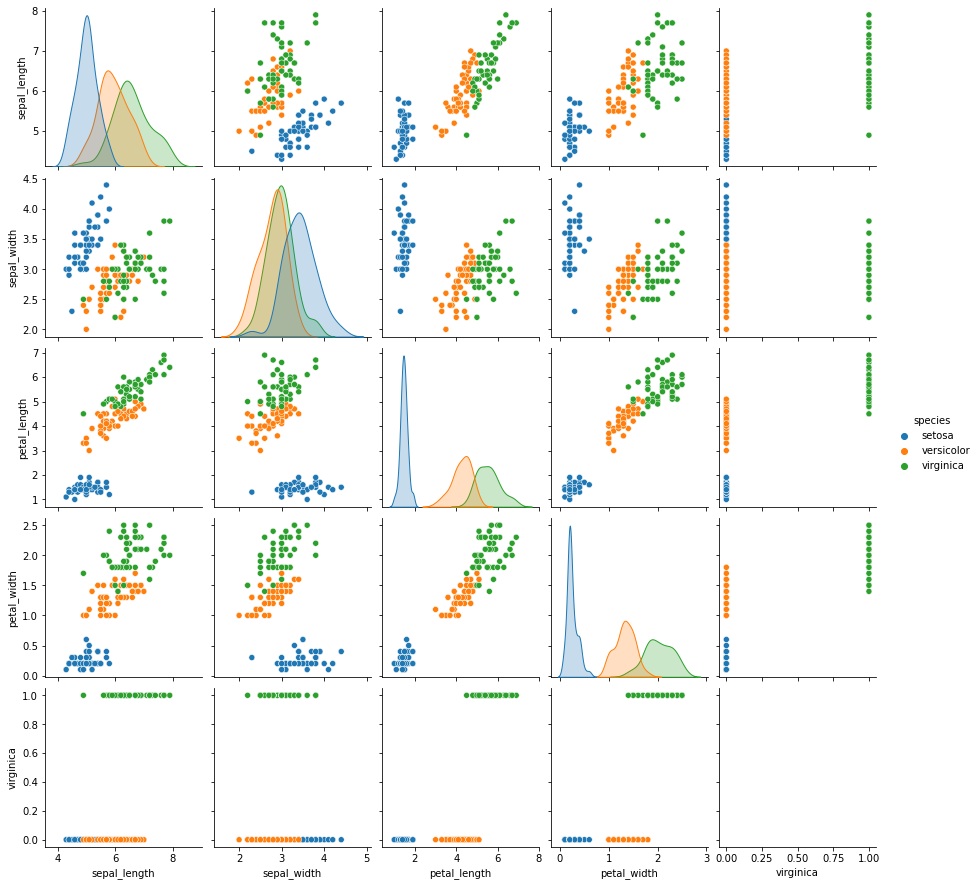

In [28]:
import seaborn as sns
sns.pairplot(df, hue = 'species')